##  Minitrabalho 1 - Testes empíricos vs. Análise de Complexidade

1. Criar um segmento de código para gerar aleatoriamente uma coleção de inteiros e devolver numa lista.
Neste exercício criam-se 3 tipos de lista:
* getIntList(length, min, max): gera uma lista ordenada aleatoriamente e recebe como argumentos o seu tamanho, o número mínimo e o número máximo da lista, em suma, o intervalo de valores que os elementos da lista podem tomar.
* getSortedL(lista): recebe uma lista gerada pela função getIntList e devolve a lista ordenada.
* getReversedL(lista): recebe uma lista gerada pela função getIntList e devolve a lista ordenada inversa.

In [5]:
import random
#cria uma lista com números dentro de um intrevalo ordenados aleatoriamente dando o seu comprimento, o seu valor mínimo e máximo
def getIntList(length, min, max):
    lista = [random.randint(min, max) for int in range(length)]
    return lista

#função que devolve uma lista ordenada
def getSortedL(lista):
    return sorted(lista)
#função que devolve uma lista ordenada inversamente
def getReversedL(lista):
    return sorted(lista, reverse = True)

#prints da lista
lista = getIntList(100, 0, 100)
print(lista)
print(getSortedL(lista))
print(getReversedL(lista))

[28, 72, 34, 83, 47, 34, 34, 96, 66, 66, 78, 41, 4, 43, 17, 50, 46, 26, 44, 44, 76, 32, 21, 92, 8, 86, 50, 38, 15, 70, 32, 85, 74, 97, 45, 50, 53, 0, 38, 44, 32, 23, 37, 19, 13, 43, 24, 79, 52, 80, 22, 93, 28, 0, 26, 61, 83, 45, 88, 100, 25, 90, 27, 39, 30, 12, 85, 39, 56, 13, 29, 89, 11, 91, 94, 5, 74, 48, 77, 24, 34, 10, 14, 20, 11, 79, 13, 52, 91, 42, 6, 3, 8, 63, 26, 36, 69, 0, 53, 11]
[0, 0, 0, 3, 4, 5, 6, 8, 8, 10, 11, 11, 11, 12, 13, 13, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 24, 25, 26, 26, 26, 27, 28, 28, 29, 30, 32, 32, 32, 34, 34, 34, 34, 36, 37, 38, 38, 39, 39, 41, 42, 43, 43, 44, 44, 44, 45, 45, 46, 47, 48, 50, 50, 50, 52, 52, 53, 53, 56, 61, 63, 66, 66, 69, 70, 72, 74, 74, 76, 77, 78, 79, 79, 80, 83, 83, 85, 85, 86, 88, 89, 90, 91, 91, 92, 93, 94, 96, 97, 100]
[100, 97, 96, 94, 93, 92, 91, 91, 90, 89, 88, 86, 85, 85, 83, 83, 80, 79, 79, 78, 77, 76, 74, 74, 72, 70, 69, 66, 66, 63, 61, 56, 53, 53, 52, 52, 50, 50, 50, 48, 47, 46, 45, 45, 44, 44, 44, 43, 43, 42, 41, 39, 39, 

2. Implementação dos algoritmos:

In [6]:
def bubbleSort(list):
    for i in range(len(list) - 1):
        for j in range(0, len(list) - i - 1): #cada elemento é comparado com um elemento adjacente
            if list[j] > list[j + 1]:   #se o elemento da esquerda for maior que o da direta
                list[j], list[j + 1] = list[j + 1], list[j] #trocam
    return list


def selectionSort(list):
    for i in range(len(list)): #percorre a lista
        min = i #define um valor minimo
        for j in range(i+1, len(list)): #percorre o resto da lista
            if list[i]>list[j]: #caso o atual minimo seja maior que o valor no index j
                min = j #o minimo é atualaizado
        list[i], list[min] = list[min], list[i] #troca a posicao
    return list

def insertionSort(list):
    for step in range(1, len(list)): #percorre a lista
        key = list[step] #guarda o atual valor
        j = step - 1 #armazena o indice do elemento anterior ao atual
        while j >= 0 and key < list[j]: #percorre os elementos anteriores ao atual, que estao ordenados e encontra a posicao correta para inserir o elemento atual
            list[j + 1] = list[j]
            j = j - 1
        list[j + 1] = key #o valor atual é inserido a posicao correta
    return list

def shellSort(list):
    n = len(list)
    gap = n//2 #comeca o intervalo de comparacao grande e reduz até ser igual a 1
    while gap > 0:
        for i in range(gap,n): #percorre a lista
            temp = list[i] #insere o elemento no sitio correto
            j = i
            while  j >= gap and list[j-gap] >temp:
                list[j] = list[j-gap]
                j -= gap
            list[j] = temp
        gap //= 2 #reduz o intervalo
    return list

def mergeSort(list):
    if len(list) > 1: #verifica se a lista tem mais de 1 elemento
        centre = len(list)//2 #divide a lista em 2 partes iguais
        left = list[:centre]
        right = list[centre:]

        mergeSort(left) #aplica recursivamente o algoritmo
        mergeSort(right)

        i = j = k = 0

        while i < len(left) and j < len(right): # fusao das duas listas já ordenadas
            if left[i] <= right[j]: #elementos da esquerda e direita comparados 1 a 1
                list[k] = left[i]
                i += 1
            else:
                list[k] = right[j]
                j += 1
            k += 1
         #os seguintes loops adicionam os elementos restantes das listas da esquerda e direita ao resultado
        while i < len(left):
            list[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            list[k] = right[j]
            j += 1
            k += 1
    return list


def quickSort(arr):
    if not arr: #verificar se a lista está vazia
        return []
    pivots = [x for x in arr if x == arr[0]] #primeiro elemento da lista definido como pivo
    #chamaddas recursivas para verificar as sublistas que contêm elementos menores e maiores que o pivo
    lesser = quickSort([x for x in arr if x < arr[0]])
    greater = quickSort([x for x in arr if x > arr[0]])

    return lesser + pivots + greater


print(quickSort(getIntList(10, 0, 10)))

[1, 1, 1, 1, 2, 4, 4, 8, 10, 10]


3.1. e 3.2. Criar uma bateria de testes e cronometrar o tempo de execução das funções, repetir isto pelo menos 35 vezes:
o argumento "testes" é o que define o número de testes feito para calcular a média.

In [7]:
import time
def cron35(alg, lista, testes):
    lst = list()
    for n in range(testes):
        i1 = time.time()
        alg(lista)
        f1 = time.time()
        t1 = f1 - i1
        lst.append(t1)
    return lst

3.2. Registar o tempo médio de execução para cada algoritmo através do array devolvido na função cron35: soma todos os elementos do array e divide pelo comprimento do mesmo.

In [8]:
def media(alg, lista, testes):
    return sum(cron35(alg, lista, testes))/len(cron35(alg, lista, testes))

In [19]:
print("Bubble Sort:")
print(media(bubbleSort, lista, 100))
print(media(bubbleSort, getSortedL(lista), 100))
print(media(bubbleSort, getReversedL(lista), 100))

print("Selection Sort:")
print(media(selectionSort, lista, 100))
print(media(selectionSort, getSortedL(lista), 100))
print(media(selectionSort, getReversedL(lista), 100))

print("Insertion Sort:")
print(media(insertionSort, lista, 100))
print(media(insertionSort, getSortedL(lista), 100))
print(media(insertionSort, getReversedL(lista), 100))

print("Shell Sort:")
print(media(shellSort, lista, 100))
print(media(shellSort, getSortedL(lista), 100))
print(media(shellSort, getReversedL(lista), 100))

print("Merge Sort:")
print(media(mergeSort, lista, 100))
print(media(mergeSort, getSortedL(lista), 100))
print(media(mergeSort, getReversedL(lista), 100))


print("Quick Sort:")
print(media(quickSort, lista, 100))
print(media(quickSort, getSortedL(lista), 100))
print(media(quickSort, getReversedL(lista), 100))

Bubble Sort:
0.0007895827293395996
0.0005246186256408691
0.0005606842041015625
Selection Sort:
0.0006944847106933594
0.00035684585571289063
0.00029619693756103514
Insertion Sort:
0.0
0.0
0.0
Shell Sort:
0.0002239203453063965
0.0
0.00011518239974975586
Merge Sort:
0.0002982330322265625
0.0
0.00012089014053344727
Quick Sort:
0.0004442119598388672
0.0005292606353759766
0.000654146671295166


4. Fazer plots dos tempos médios de cada função, para cada um dos casos.
Optámos por apresentar dois tipos de gráficos:
* graphAlg(alg, inputSize, testes): um gráfico que representa o tempo médio do algoritmo em função do tamanho do input: cada ponto é a média do tempo dos x testes para cada um input. O objetivo é ter um gráfico para cada um dos algortimos;
* graphAlgMean(alg, lista, inputSize): gráfico da variação do tempo de cada uma das 35 vezes, com o mesmo input em todas em cada teste;
* um gráfico com todos os algoritmos e a média dos x testes para cada um dos casos: lista ordenada, lista ordenada inversamente e lista aleatória, ou seja, simulando o pior dos casos ou o mais simples de resolver.

In [9]:
import matplotlib.pyplot as plt
#devolve um gráfico em que se pode observar a ordem de complexidade de cada algortimo e o seu comportamento
#recebe um algoritmo, o tamanho máximo das listas que vão ser ordenadas e o número de testes para cada lista
def graphAlg(alg, inputSize, testes):
    #valores do eixo x: tamanho de cada lista
    xpoints = np.arange(0, inputSize)

    mediaT = []
    #ciclo que gera uma lista de cada tamanho de 0 ao inputSize
    for i in range(inputSize):
        lista = getIntList(i, 0, inputSize)
        mediaT.append(media(alg, lista, testes))
    #array que guarda os tempos médios de execução para cada tamanho da lista
    mediaTempos = np.array(mediaT)
    #valores do eixo y: tempos médios de cada execução
    ypoints = mediaTempos

    plt.xlabel('Tamanho do input')

    plt.ylabel('Tempos de execução do algoritmo')

    plt.plot(xpoints, ypoints, 'o')
    plt.show()

#valores para testes:
inputSize = 500
testes = 100

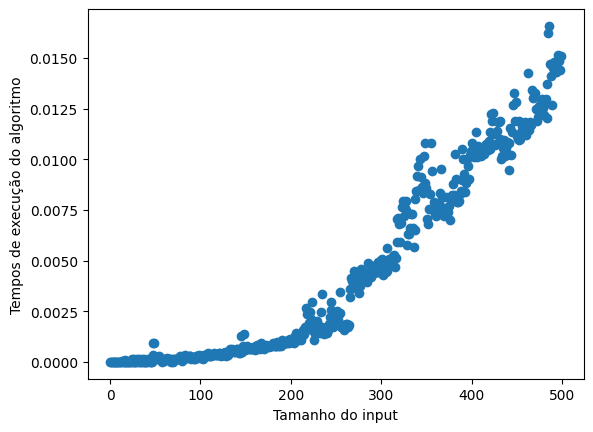

In [21]:
graphAlg(bubbleSort, inputSize, testes)

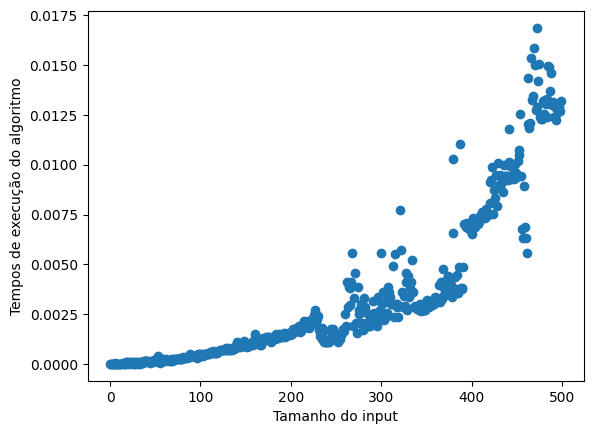

In [22]:
graphAlg(selectionSort, inputSize, testes)

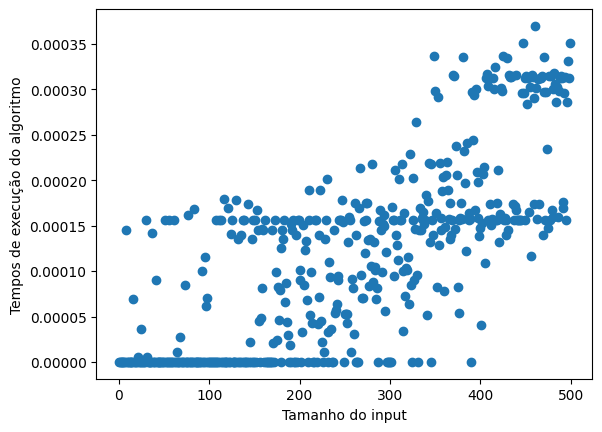

In [23]:
graphAlg(insertionSort, inputSize, testes)

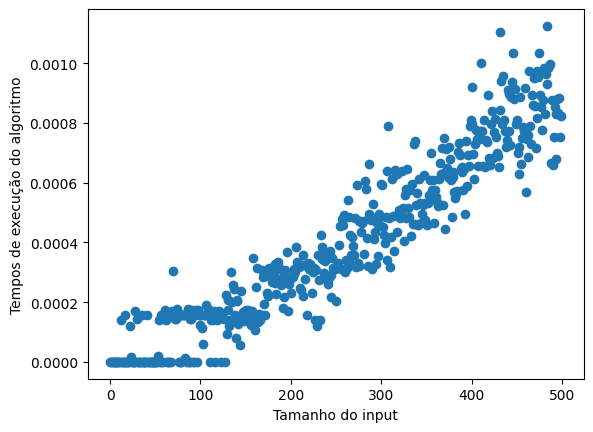

In [24]:
graphAlg(shellSort, inputSize, testes)

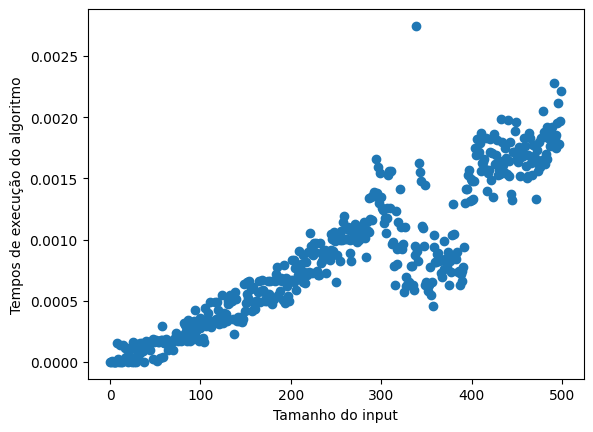

In [25]:
graphAlg(mergeSort, inputSize, testes)

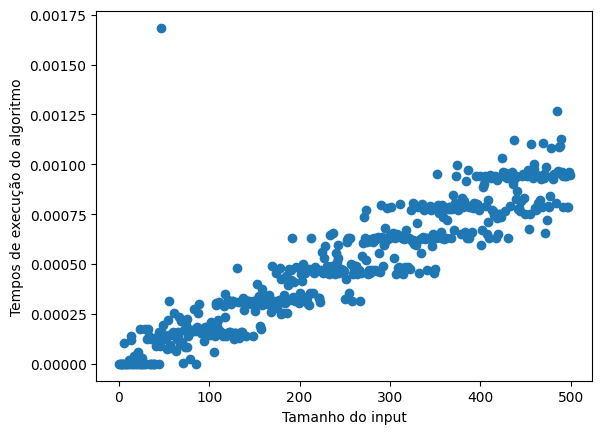

In [10]:
graphAlg(quickSort, inputSize, testes)

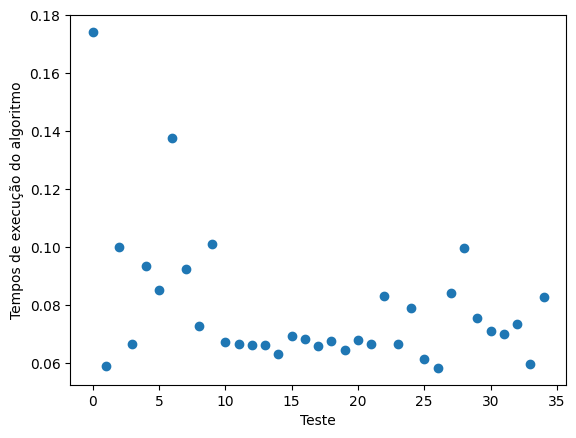

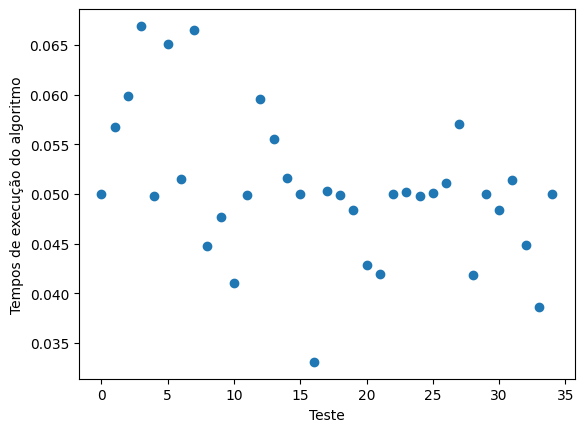

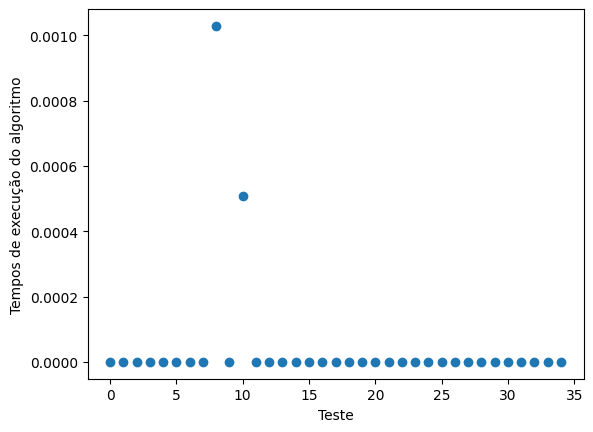

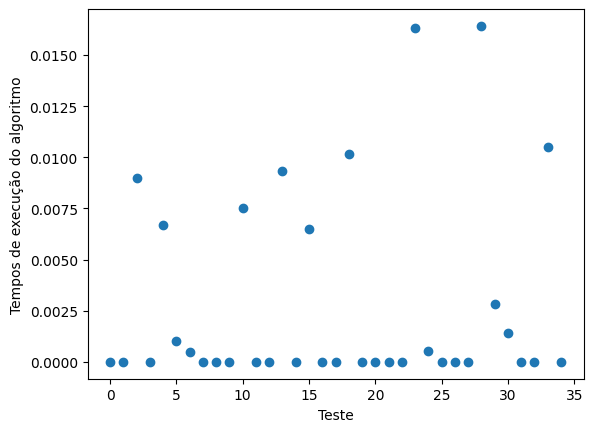

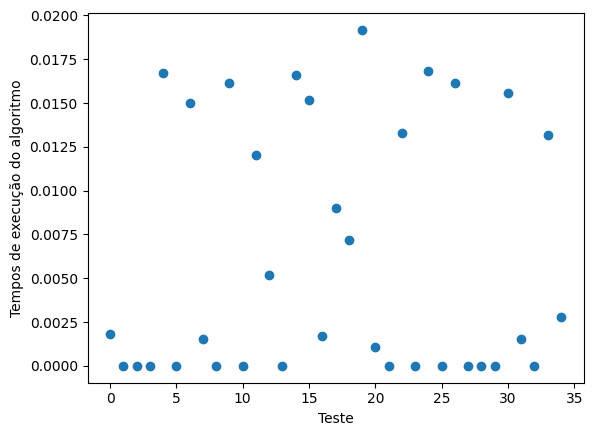

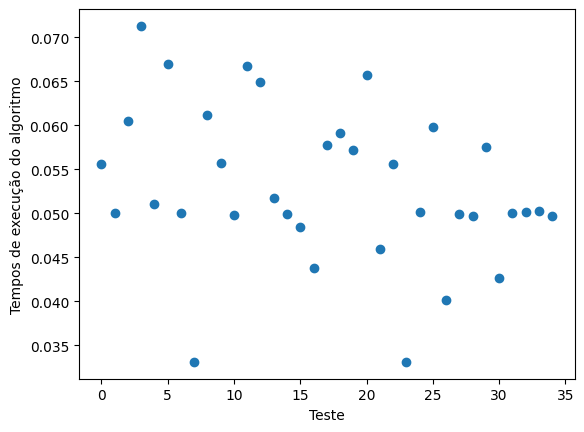

In [27]:
#devolve um gráfico que mostra o tempo de execução de cada teste, tudo para a mesma lista, de onde se pode calcular o tempo médio de execução do algoritmo
#recebe um algoritmo, uma lista por ordenar e o número de testes a realizar
def graphAlgMean(alg, lista, inputSize):
    #valores do eixo-x: o número do teste
    xpoints = np.arange(0, inputSize)
    #valores do eixo-y: o tempo da execução
    ypoints = cron35(alg, lista, inputSize)

    plt.xlabel('Teste')

    plt.ylabel('Tempos de execução do algoritmo')

    plt.plot(xpoints, ypoints, 'o')
    plt.show()

inputSize = 35
lista = getIntList(1000, 0, 500)
graphAlgMean(bubbleSort, lista, inputSize)
graphAlgMean(selectionSort, lista, inputSize)
graphAlgMean(insertionSort, lista, inputSize)
graphAlgMean(shellSort, lista, inputSize)
graphAlgMean(mergeSort, lista, inputSize)
graphAlgMean(quickSort, lista, inputSize)

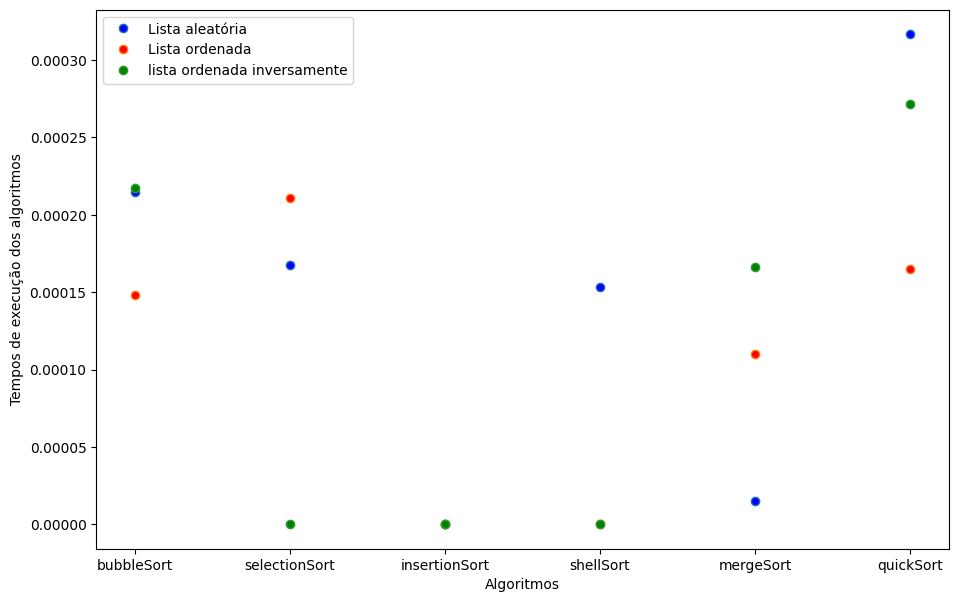

In [28]:
import numpy as np
#array de strings com o nome de cada algoritmo
algs1 = ["bubbleSort", "selectionSort", "insertionSort", "shellSort", "mergeSort", "quickSort"]
#array dos algoritmos a usar
algs = [bubbleSort, selectionSort, insertionSort, shellSort, mergeSort, quickSort]

#valores do eixo-x: algoritmos a usar
xpoints = np.array(algs1)

lista = getIntList(50, 0, 100)

tempoL = [] #array com os tempos de execução de cada algoritmo numa lista ordenada aleatoriamente
tempoSL = [] #array com os tempos de execução de cada algoritmo numa lista ordenada
tempoRL = [] #array com os tempos de execução de cada algoritmo numa lista ordenada inversamente
for i in range(len(algs)):
    tempoL.append(media(algs[i], lista, 100))
    tempoSL.append(media(algs[i], getSortedL(lista), 100))
    tempoRL.append(media(algs[i], getReversedL(lista), 100))
#valores do eixo-y: tempo médio de execução de cada algoritmo em função do tipo de lista
y = np.array(tempoL)
y1 = np.array(tempoSL)
y2 = np.array(tempoRL)

fig, ax = plt.subplots(figsize=(11,7))
ax.set_xlabel('Algoritmos')
ax.set_ylabel('Tempos de execução dos algoritmos')

ax.plot(xpoints, y, 'o', markerfacecolor="blue", label='Lista aleatória')
ax.plot(xpoints, y1, 'o', markerfacecolor="red", label='Lista ordenada')
ax.plot(xpoints, y2, 'o', markerfacecolor="green", label='lista ordenada inversamente')
leg = ax.legend();
plt.show()

5. Que conclusões pode retirar da análise dos gráficos?
Nota: Deve estabelecer ligações entre os tempos médios encontrados e as ordens de complexidade conhecidas
para os algoritmos, explicando qualquer discrepância que venha a ser encontrada.

Através do exercício 4 foi possível observar os tempos médios de cada função e testar cada algortimo em função do tamanho da lista gerada aleatoriamente: foram realizados testes com listas de tamanho superior a 1000 e inferior a 50, de forma a verificar se o comportamento dos algortimos é afetado por este fator.
Ao comparar os valores obtidos nos testes com listas de menor tamanho, identifica-se uma maior rapidez ao usar os algoritmos Merge Sort e Quick Sort. Estes valores estão em concordância com o esperado, sendo as suas ordens de complexidade conhecidas de O(n * log(n)) por reduzirem o tamanho da lista em que estão a executar as operações a cada passo. O algoritmo Shell Sort mostra-se também bastante eficaz, com complexidade de O(n(log(n))^2^). Os algoritmos observados mais lentos são o Bubble Sort e o Selection Sort, com ordens de complexidades conhecidas de O(n^2^); apesar disto o selection sort é indicado para listas de tamanho mais reduzido, verificando-se por este algoritmo ser mais rápido em listas pequenas do que nos testes das listas com maior tamanho. Esta ordem de complexidade vem do loop dentro do loop: ambos os algoritmos têm um ciclo "for" dentro de outro, O(n)*O(n)=O(n^2^). Para o algoritmo Insertion Sort os resultados não foram os esperados, apresentando valores díspares em divergência com a sua ordem de complexidade conhecida O(n^2^).
Relativamente aos testes com listas de maior tamanho, observa-se o Insertion Sort, por apresentar valores dispersos, e o Shell Sort, por demorar mais tempo que o esperado, com a maior discrepância em relação ao expectável. Com isto, o Merge Sort e o Quick Sort são os mais rápidos, como seria o esperado, sendo o Bubble Sort e o Selection Sort os mais demorados.

6. Se ainda não o fez, gere agora sequências ordenadas de inteiros (use um range( ), por exemplo) e faça de novo
as cronometragens. Há alguma diferença? Indique qual(ais) a(s) diferença(s) e justifique em termos de análise
de complexidade de algoritmos.

Aquando utilizada uma sequência já ordenada de inteiros, os algoritmos comportam-se de forma semelhante à de quando é utilizada uma lista aleatória. Ainda assim é possível verificar algumas diferenças. No algoritmo Bubble Sort, como a lista está ordenada, não serão efetuadas trocas sendo que este compara os elementos adjacentes e trocá-los-ia no caso de não estarem ordenados. Assim, o algoritmo terminará em O(n) segundos. Quanto ao Selection Sort, este procura o menor valor na lista e troca-o com o primeiro elemento que não se encontra ordenado. Assim, a ordem de complexidade, teoricamente, manter-se-á igual, isto é O(n^2^), no entanto, não é isso que se verifica tendo em conta que a lista ordenada é ligeiramente mais demorada do que uma lista aleatória. O Insertion Sort compara o elemento com os anteriores e coloca-o no lado da lista já ordenada, deste modo, não serão efetuados trocas e o algoritmo terminará em O(n) segundos.O Shell Sort é uma variação do insertion sort que usa um par intervalado e vai diminuindo este este intervalo à medida que ordena a lista. Como a lista está já ordenada o grau de complexidade é O(n log n). O Merge Sort utiliza a estratégia dividir para conquistar que continua a ser aplicável neste tipo de listas, desta maneira, seria expectável que o grau de complexidade se mantivesse O(n log n), no entanto, ao analisar o gráfico é possível verificar que a lista ordenada é mais demorada que a aleatória. Por último o algoritmo quicksort implementado opta por utilizar o primeiro elemento como pivot, o que representa o pior caso quando se depara com uma lista ordenada. Este terá um grau de complexidade de O(n^2^). No entanto, mais uma vez esta teoria não é confirmada pelo gráfico.
Observação: É possivel observar os tempos no último gráfico apresentado.

7. Mostre, usando o Método Indutivo, que o algoritmo da Seleção Linear está correto. Inicie por apresentar um
pseudo-código para este algoritmo.

### Pseudo-Código:

In [ ]:
""""
SelectionSort(lista):
    //ordenar uma sequência por ordem crescente
    //Input: sequência a ordenar
    //Output: sequência ordenada
	Para i <= tamanho da lista:
		min = i
		Para i+1 <= j <= tamanho da lista:
			Se (indice i da lista) > (indice j da lista):
				min = j
		(indice i da lista), (indice min da lista) = (indice min da lista), (indice i da lista) #troca os valores
	Devolve lista
"""

• Hipótese de Indução:
Se a lista está ordenada do indice 1 até ao indice i-1, ou seja, A[1 até i-1], então após a iteração do primeiro for A[1 até i] está ordenado.
• Caso Base:
Quando i = 1, A[1] contém um só elemento, logo, está ordenada.
• Passo de Indução:
Ao entrar no segundo ciclo assume-se que A[1 até i-1] está ordenado. Queremos mostrar que A[1 até i] está ordenada depois da iteração i.
Supondo que j1 é o maior elemente de 0 a i-1, tal que A[j1] < A[i]. Por isto, usando a hipótese de indução, temos que A[j1] <= A[j] (sendo que j1<j), ou seja, A[i] é maior que os elementos de 0 a j1. Portanto, A[i] está colocado no local correto e sendo assim os restantes elementos de 1 a i, por hipótese, estão também ordenados.
• Conclusão:
Usando indução, concluímos que a hipótese indutiva é válida para todo o i.	Isto implica que após a iteração n-1, no final do algoritmo, a sequência A[1 até n] está ordenada.